## Section 1: Architecture of the Transformer

Firstly, we will provide a general overview of the model we aim to build. This provides a chance to introduce many concepts which will be discussed thoroughly in the following sections. Let's visualize the architecture of the NN (from [Vaswani et al. (2017)](https://arxiv.org/pdf/1706.03762.pdf)).

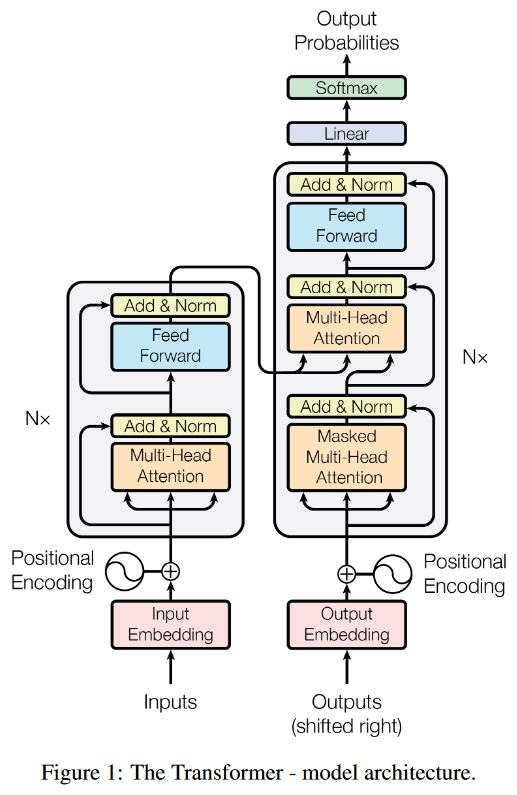

In [94]:
from IPython.display import Image
Image(filename='Vaswani_et_al_2017_Fig_1.JPG') 

### Encoding-decoding models.
What we will build is an encoding-decoding (ED) model. ED models consist of two main components: an **encoder** and a **decoder**.

The encoder takes the source sentence (the sentence to be translated, in this case in English) as input and converts it into a fixed-length vector representation. In other words, the encoder maps an input sequence of symbol representations x = (x1, ..., xn) to a sequence of continuous representations z = (z1, ..., zn), called the **context vector**. This vector contains information about the meaning of the source sentence and is used by the decoder to generate the translated sentence. Given z, the decoder then generates an output sequence y = (y1, ..., ym) of symbols one element at a time. At each step the model is auto-regressive, consuming the previously generated symbols as additional input when generating the next. The encoder and decoder are trained together to learn the relationship between the source and target languages, and over time, the model becomes better at translating sentences from one language to another.

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder (left in figure) and decoder (right). In this introductory Section, we will provide a high-level overview of the NN architecture. However, before that, we will describe a couple of operations applied to the input to both the encoder and decoder before it is fed to the NN, namely *input embedding* and *positional encoding*.


### Input Embedding.
The first step to training our model (and the first topic we will cover) is *input embedding*. Input embedding of the source (encoder) or target (decoder) sentence is the process of converting the words of the source sentence into a continuous vector representation, also known as **word embeddings**, before being passed as input to the encoder of the machine translation model.

Word embeddings are dense, low-dimensional vectors that represent words in a continuous vector space. These embeddings capture semantic and syntactic information about the words, which allows the model to understand the meaning of the words in the sentence. The embeddings are learned during the training process of the model.

Embedding the source sentence can be done by looking up the embeddings of each word in the sentence in an embedding matrix, and then concatenating or averaging them to form a single vector representation for the entire sentence. This process is done *before* passing the sentence to the encoder/decoder, as it allows the model to understand the meaning of the words in the sentence and make better decisions about how to translate them.

Before embedding, text needs to be preprocessed and **vectorized**. Preprocessing is dicussed in Section 2. Vectorization is discussed in Section 3. Input embedding is discussed in Sections 4 and 5.


### Positional Encoding.
The second step is to add the Positional Encoding Matrix (PEM) to the input embedding of the decoder. **Positional encoding** is a technique that is used to help NNs to take into account the *order* or *position* of the words in a sentence. This is important because the order of words can convey important information about the meaning of a sentence.

Word embeddings are mathematical representations of words that capture their meaning. However, these vectors do not contain any information about the position of the words in a sentence. This means that the model cannot understand the order of the words in a sentence, which is important for understanding the meaning of a sentence. Positional encoding solves this problem by adding additional information to the vectors that represents the position of the words in a sentence. This information is usually added in the form of a matrix, where each row corresponds to a word in the sentence, and each column corresponds to a dimension of the position. The process of adding positional encoding to a sentence is typically done by adding the matrix to the vector representation of the words in the sentence (word embedding). This creates a new representation of the sentence that contains both the meaning of the words and their position in the sentence.


### Attention.
A key concept for transformers is **attention**. Attention corresponds to generating weights for each word (embedding) in the sentence to represent how much his meaning or gramatical form is related to all the other word (embeddings) in the sentence. In order to extract the final meaning (its final representation within the context), the transformer combines the word embedding (the info regarding 'basic' meaning), with the positional information (the PEM), and with the attention scores (i.e., how much each word interrelates to other words in the sentence).

Attention is discussed in detail in Section 6.


### Encoder.
The encoder is composed of a stack of 6 identical layers. Each layer has two sub-layers. The first is a **multi-head self-attention mechanism**, and the second is a simple, position-wise fully connected feed-forward network.

In brief, the *self-attention mechanism* is the key component that allows the transformer to "pay attention" to different parts of the source sentence when generating each word in the target sentence. This allows the model to "remember" what it has seen so far in the source sentence and use this information to inform its predictions for the remaining words in the target sentence.

We will be discussing (self-)attention and the multi-head self-attention sublayer, as well as the fully-connected feed-forward network in Section 6.

Further, **residual connection** around each of the two sub-layers is applied, followed by layer normalization. That is, the output of each sub-layer is LayerNorm(x + Sublayer(x)), where Sublayer(x) is the function implemented by the sub-layer itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding layers, produce outputs of dimension dmodel = 512.

We will be discussing residual connection in Section 6.


### Decoder.
The decoder is also composed of a stack of 6 identical layers. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack. Similar to the encoder, we employ residual connections around each of the sub-layers, followed by layer normalization. We also modify the self-attention sub-layer in the decoder stack to prevent positions from attending to subsequent positions. This **masking**, combined with fact that the output embeddings are offset by one position, ensures that the predictions for position i can depend only on the known outputs at positions less than i.


### Training the model.
In brief, the **Adam optimizer** three types of regularization during training were used. This is discussed in Sections 10 and 11.


### Getting started.
It's now time to proceed and get our hands dirty and start to build and train the model. As a first step, we need to make sure to have the correct working TensorFlow environment for Python3. In the next section, will be taking a look at the source data and apply a few preprocessing steps.

In [95]:
# Check Python and TensorFlow version.
# The former should be >= 3.9
# The latter NEEDS to be >= 2.10

import sys
import tensorflow as tf 

print(f"Python version: {sys.version}")
print(f"TensorFlow version: {tf. __version__}") 

Python version: 3.9.15 (main, Nov 24 2022, 14:39:17) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.10.1
